### Methods

#### Understanding the data: 
- I started by using the pandas library to read in my csv file. By utilizing the ```.index()``` and ```.columns()``` I was able to see the number of rows and columns in my dataframe.

- I then used the ```.head()``` method which is a method on a dataframe object and passed in the number 10 so I can just see the first 10 rows of data.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

#Reading the dataset in a dataframe using Pandas
df = pd.read_csv("./data/mock_app_data.csv") 

#returns number of rows
print("num of rows: ", len(df.index))

#returns number of columns
print("num of columns: ", len(df. columns))

#returns first 10 rows with header
df.head(10)

num of rows:  1000
num of columns:  14


,id,first_name,last_name,email,gender,street_address,city,state,date_applied,profession,income,married,ssn,site_visits
0,1000,Gwendolin,Jakolevitch,gjakolevitch0@ezinearticles.com,Female,99 Sachs Pass,Loretto,Minnesota,01/03/2018,Administrative Assistant II,63636.0,False,398-17-3277,Monthly
1,1001,Olenolin,O'Downe,oodowne1@amazonaws.com,Male,11539 Susan Point,Jacksonville,Florida,02/14/2016,Senior Developer,69610.0,False,856-65-4413,Daily
2,1002,Ebenezer,Stalman,estalman2@aol.com,Male,823 Bowman Road,Little Rock,Arkansas,03/29/2017,Safety Technician II,66230.0,True,808-60-9170,Never
3,1003,Antoine,Arias,aarias3@tripadvisor.com,Male,35536 Roth Plaza,Amarillo,Texas,03/22/2016,Data Coordiator,50151.0,True,359-92-2843,Never
4,1004,Josias,Candlin,jcandlin4@arstechnica.com,Male,629 Pond Lane,Cincinnati,Ohio,06/30/2016,Design Engineer,39419.0,False,535-56-2192,Once
5,1005,Alf,Amberger,aamberger5@unesco.org,NaN,05 Sachtjen Center,Washington,District of Columbia,07/23/2016,Administrative Assistant III,NaN,NaN,NaN,NaN
6,1006,Cordy,McTeer,cmcteer6@marriott.com,Male,776 Walton Pass,Honolulu,Hawaii,05/07/2016,Design Engineer,47639.0,True,599-07-6728,Once
7,1007,Casey,Mardee,cmardee7@hud.gov,Female,19 Victoria Crossing,Denver,Colorado,07/28/2016,Software Consultant,50904.0,True,534-79-3538,Never
8,1008,Sumner,Brabham,sbrabham8@google.ca,Male,2 Bluejay Drive,Chicago,Illinois,09/18/2017,Human Resources Assistant III,35950.0,True,241-56-9159,Seldom
9,1009,Perl,Pearman,ppearman9@photobucket.com,Female,883 Porter Road,Rochester,New York,02/27/2017,Senior Financial Analyst,74806.0,False,583-15-3917,Daily


#### Data Exploration

- Using the ```.describe()``` function I was able to see the count, mean, standard deviation (std), min, quartiles and max in its output. We will ignore the id column since it's just an application id and we don't need to do any analysis on it. 

- We can see from the output that there are rows in the income column is missing 61 values since the file has 1000 rows and count returned 939.

- Using ```df['female'].value_counts()``` function we can determine how many applicants were male and how many were female. From this I can determine that there are 61 missing records from gender by adding both counts together and subtracting from the total row count.

In [10]:
# basic description of the data
df.describe()

,id,income
count,1000.000000,939.000000
mean,1499.500000,55165.820021
std,288.819436,11718.398734
min,1000.000000,35005.000000
25%,1249.750000,44863.000000
50%,1499.500000,54976.000000
75%,1749.250000,65493.000000
max,1999.000000,74991.000000


In [9]:
# count for variations in gender that have values
df['gender'].value_counts()

Female    479
Male      460
Name: gender, dtype: int64

### Structuring data into a meaningful format
Once I knew what kind of data I was working with. I now wanted to visualize it. 

- I used ```.boxplot(column='income')``` to make a plot chart of the variance in applicant's income.
- Here I can clearly see that the range in income is from 35,000 to 75,000 and the median was right around 55,000.
- I then used ```.boxplot(column='income', by = 'gender', patch_artist=True)``` to visually see a comparison of income between male and female.

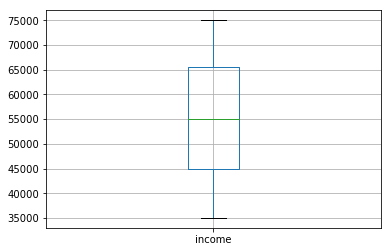

In [8]:
# visually ploting the range in income and the median for all applicants
df.boxplot(column= 'income')

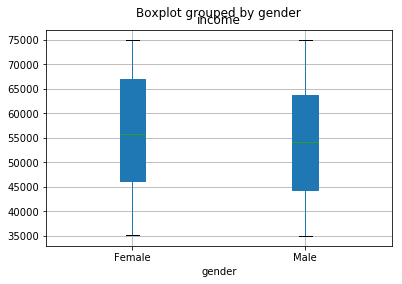

In [11]:
# visually plotting a comparison of income between male and female.
bp = df.boxplot(column='income', by = 'gender', patch_artist=True)

### Data Manipulation
- Using Panda's replace function we can replace true and false values with binary values.

In [22]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

df = pd.read_csv("./data/mock_app_data.csv") 

#Define a generic function using Pandas replace function
def coding(col, codeDict):
  colCoded = pd.Series(col, copy=True)
  for key, value in codeDict.items():
    colCoded.replace(key, value, inplace=True)
  return colCoded
 
#Coding employed as True=1, False=0:
print ('Before Coding: ')
print (pd.value_counts(df["married"]))
df["married_binary"] = coding(df["married"], {'FALSE':0,'TRUE':1})
print ('\nAfter Coding: ')
print (pd.value_counts(df["married_binary"]))

Before Coding: 
True     470
False    469
Name: married, dtype: int64

After Coding: 
True     470
False    469
Name: married_binary, dtype: int64


In [24]:
# print data type of columns
df.dtypes

id                  int64
first_name         object
last_name          object
email              object
gender             object
street_address     object
city               object
state              object
date_applied       object
profession         object
income            float64
married            object
ssn                object
site_visits        object
married_binary     object
dtype: object

In [35]:
def num_missing(x):
  return sum(x.isnull())

#Applying per column:
print ("Missing values per column: ")
print (df.apply(num_missing, axis=0)) 
#axis=0 defines that function is to be applied on each column

#Applying per row:
print ("\nMissing values per row: ")

#axis=1 defines that function is to be applied on each row
print (df.apply(num_missing, axis=1).head()) 


Missing values per column: 
id                 0
first_name         0
last_name         34
email             37
gender            61
street_address     0
city               0
state              0
date_applied       0
profession         0
income            61
married           61
ssn               61
site_visits       61
married_binary    61
dtype: int64

Missing values per row: 
0    0
1    0
2    0
3    0
4    0
dtype: int64


In [40]:
df['site_visits'].value_counts()

Once       127
Yearly     126
Seldom     122
Never      120
Often      115
Monthly    111
Daily      111
Weekly     107
Name: site_visits, dtype: int64

In [43]:
#drop uncessary column 
df.drop('ssn',axis='columns',inplace=True)
df

,id,first_name,last_name,email,gender,street_address,city,state,date_applied,profession,income,married,site_visits,married_binary
0,1000,Gwendolin,Jakolevitch,gjakolevitch0@ezinearticles.com,Female,99 Sachs Pass,Loretto,Minnesota,01/03/2018,Administrative Assistant II,63636.0,False,Monthly,False
1,1001,Olenolin,O'Downe,oodowne1@amazonaws.com,Male,11539 Susan Point,Jacksonville,Florida,02/14/2016,Senior Developer,69610.0,False,Daily,False
2,1002,Ebenezer,Stalman,estalman2@aol.com,Male,823 Bowman Road,Little Rock,Arkansas,03/29/2017,Safety Technician II,66230.0,True,Never,True
3,1003,Antoine,Arias,aarias3@tripadvisor.com,Male,35536 Roth Plaza,Amarillo,Texas,03/22/2016,Data Coordiator,50151.0,True,Never,True
4,1004,Josias,Candlin,jcandlin4@arstechnica.com,Male,629 Pond Lane,Cincinnati,Ohio,06/30/2016,Design Engineer,39419.0,False,Once,False
5,1005,Alf,Amberger,aamberger5@unesco.org,NaN,05 Sachtjen Center,Washington,District of Columbia,07/23/2016,Administrative Assistant III,NaN,NaN,NaN,NaN
6,1006,Cordy,McTeer,cmcteer6@marriott.com,Male,776 Walton Pass,Honolulu,Hawaii,05/07/2016,Design Engineer,47639.0,True,Once,True
7,1007,Casey,Mardee,cmardee7@hud.gov,Female,19 Victoria Crossing,Denver,Colorado,07/28/2016,Software Consultant,50904.0,True,Never,True
8,1008,Sumner,Brabham,sbrabham8@google.ca,Male,2 Bluejay Drive,Chicago,Illinois,09/18/2017,Human Resources Assistant III,35950.0,True,Seldom,True
9,1009,Perl,Pearman,ppearman9@photobucket.com,Female,883 Porter Road,Rochester,New York,02/27/2017,Senior Financial Analyst,74806.0,False,Daily,False


In [51]:
df['gender'].fillna('other', inplace=True)
df

,id,first_name,last_name,email,gender,street_address,city,state,date_applied,profession,income,married,site_visits,married_binary
0,1000,Gwendolin,Jakolevitch,gjakolevitch0@ezinearticles.com,Female,99 Sachs Pass,Loretto,Minnesota,01/03/2018,Administrative Assistant II,63636.0,False,Monthly,False
1,1001,Olenolin,O'Downe,oodowne1@amazonaws.com,Male,11539 Susan Point,Jacksonville,Florida,02/14/2016,Senior Developer,69610.0,False,Daily,False
2,1002,Ebenezer,Stalman,estalman2@aol.com,Male,823 Bowman Road,Little Rock,Arkansas,03/29/2017,Safety Technician II,66230.0,True,Never,True
3,1003,Antoine,Arias,aarias3@tripadvisor.com,Male,35536 Roth Plaza,Amarillo,Texas,03/22/2016,Data Coordiator,50151.0,True,Never,True
4,1004,Josias,Candlin,jcandlin4@arstechnica.com,Male,629 Pond Lane,Cincinnati,Ohio,06/30/2016,Design Engineer,39419.0,False,Once,False
5,1005,Alf,Amberger,aamberger5@unesco.org,other,05 Sachtjen Center,Washington,District of Columbia,07/23/2016,Administrative Assistant III,NaN,NaN,NaN,NaN
6,1006,Cordy,McTeer,cmcteer6@marriott.com,Male,776 Walton Pass,Honolulu,Hawaii,05/07/2016,Design Engineer,47639.0,True,Once,True
7,1007,Casey,Mardee,cmardee7@hud.gov,Female,19 Victoria Crossing,Denver,Colorado,07/28/2016,Software Consultant,50904.0,True,Never,True
8,1008,Sumner,Brabham,sbrabham8@google.ca,Male,2 Bluejay Drive,Chicago,Illinois,09/18/2017,Human Resources Assistant III,35950.0,True,Seldom,True
9,1009,Perl,Pearman,ppearman9@photobucket.com,Female,883 Porter Road,Rochester,New York,02/27/2017,Senior Financial Analyst,74806.0,False,Daily,False


In [52]:
df['gender'].value_counts

<bound method IndexOpsMixin.value_counts of 0      Female
1        Male
2        Male
3        Male
4        Male
5       other
6        Male
7      Female
8        Male
9      Female
10       Male
11      other
12       Male
13     Female
14     Female
15       Male
16     Female
17       Male
18      other
19     Female
20     Female
21     Female
22     Female
23       Male
24       Male
25     Female
26     Female
27     Female
28       Male
29     Female
        ...  
970    Female
971    Female
972    Female
973    Female
974      Male
975    Female
976      Male
977    Female
978      Male
979    Female
980    Female
981      Male
982    Female
983      Male
984    Female
985    Female
986      Male
987    Female
988      Male
989      Male
990    Female
991      Male
992      Male
993      Male
994    Female
995    Female
996    Female
997      Male
998      Male
999     other
Name: gender, Length: 1000, dtype: object>